In [1]:
from tqdm import tqdm
from torchvision import transforms
from PIL import Image, ImageChops
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def resize_image_limit(img, max_width, max_height):
    """
    img - PIL.Image object
    max_width - maximum width allowed
    max_height - maximum height allowed

    This function rescale image by keeping its shape

    Reshape the image based on the shortest edge
    """
    if img.size[1] < img.size[0]:
        if img.size[1] > max_height:
            y = max_height
            x = max_height * (img.size[0] / img.size[1])
    elif img.size[0] <= img.size[1]:
        if img.size[0] > max_width:
            x = max_width
            y = max_width * (img.size[1] / img.size[0])
    else:
        return img
    p = transforms.Compose([transforms.Resize([round(y), round(x)])])
    return p(img)

def is_greyscale(im):
    if im.mode not in ("L", "RGB"):
        raise ValueError("Unsupported image mode")

    if im.mode == "RGB":
        rgb = im.split()
        if ImageChops.difference(rgb[0], rgb[1]).getextrema()[1]!=0:
            return False
        if ImageChops.difference(rgb[0], rgb[2]).getextrema()[1]!=0:
            return True
    return True

(2214, 1974)
The image is greyscale.


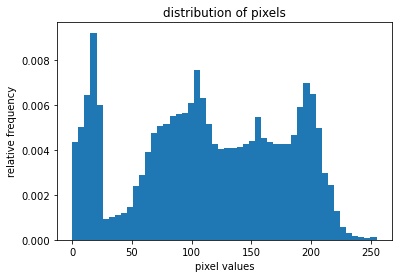

In [3]:
# img = Image.open('Data/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg')
img = Image.open('../Pneumonia_classification_data/chest_xray/train/NORMAL/IM-0225-0001.jpeg')
print(img.size)
if is_greyscale(img):
    print(f'The image is greyscale.')
    img_np = np.array(img)
    # Plot image pixel values in histogram
    plt.hist(img_np.ravel(), bins=50, density=True)
    plt.xlabel("pixel values")
    plt.ylabel("relative frequency")
    plt.title("distribution of pixels")

Text(0.5, 1.0, 'distribution of pixels')

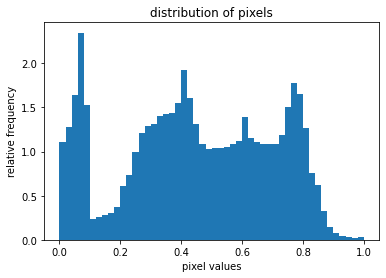

In [4]:
# Normalize the image pixel value range from (0, 256) to (0, 1)
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img)
img_np = np.array(img_tensor)
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

In [8]:
dir = r'../Pneumonia_classification_data/chest_xray'

list_size_not_norm = []
min_width = 99999
min_height = 99999
for root, dirs, files in os.walk(dir):
    for name in files:
        filepath = root + os.sep + name
        if filepath.endswith(".jpeg"):
            img = Image.open(filepath)
            if img.size[0] < img.size[1]:
                list_size_not_norm.append([filepath, img.size[0], img.size[1]])
            if img.size[0] < min_width:
                min_width = img.size[0]
            if img.size[1] < min_height:
                min_height = img.size[1]

In [ ]:
for root, dirs, files in os.walk(dir):
    print(root)

In [18]:
print(list_size_not_norm)

[['Data/chest_xray\\test\\NORMAL\\IM-0041-0001.jpeg', 2022, 2071], ['Data/chest_xray\\test\\NORMAL\\IM-0103-0001.jpeg', 1970, 2085], ['Data/chest_xray\\test\\NORMAL\\NORMAL2-IM-0019-0001.jpeg', 2043, 2087], ['Data/chest_xray\\test\\NORMAL\\NORMAL2-IM-0030-0001.jpeg', 2517, 2713], ['Data/chest_xray\\train\\NORMAL\\IM-0140-0001.jpeg', 1156, 1237], ['Data/chest_xray\\train\\NORMAL\\IM-0172-0001.jpeg', 1876, 1893], ['Data/chest_xray\\train\\NORMAL\\IM-0371-0001.jpeg', 2024, 2036], ['Data/chest_xray\\train\\NORMAL\\IM-0413-0001.jpeg', 2318, 2411], ['Data/chest_xray\\train\\NORMAL\\IM-0501-0001.jpeg', 1870, 1905], ['Data/chest_xray\\train\\NORMAL\\IM-0581-0001.jpeg', 1338, 1433], ['Data/chest_xray\\train\\NORMAL\\IM-0595-0001.jpeg', 1924, 2102], ['Data/chest_xray\\train\\NORMAL\\IM-0608-0001-0002.jpeg', 1580, 1604], ['Data/chest_xray\\train\\NORMAL\\IM-0660-0001-0002.jpeg', 1654, 1688], ['Data/chest_xray\\train\\NORMAL\\NORMAL2-IM-0441-0001.jpeg', 2288, 2363], ['Data/chest_xray\\train\\NORMA

In [20]:
print(f'Picture minimum width: {min_width:.1f}, minimum height {min_height:.1f}')

Picture minimum width: 384.0, minimum height 127.0


Text(0, 0.5, 'Height (Pixels)')

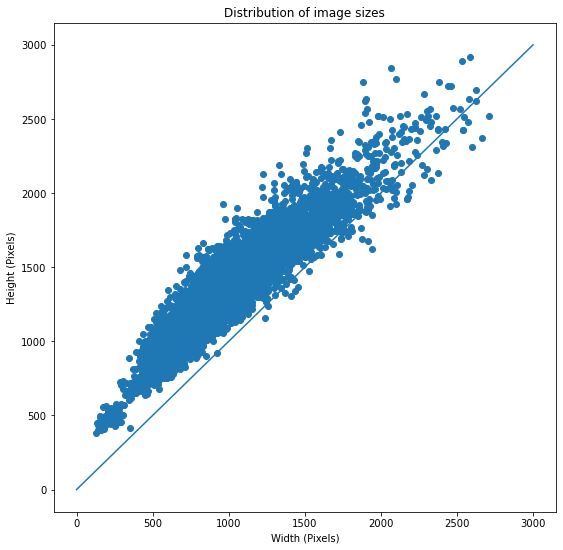

In [10]:
dir = r'../Pneumonia_classification_data/chest_xray'
widths = []
heights = []
shapes = []
for root, dirs, files in os.walk(dir):
    for name in files:
        filepath = root + os.sep + name
        if filepath.endswith('.jpeg'):
            img = Image.open(filepath)
            widths.append(img.size[0])
            heights.append(img.size[1])
plt.figure(figsize=(9,9))
plt.scatter(heights, widths)
x = np.linspace(0, 3000, 10)
plt.plot(x, x, linestyle='solid')  # Create a boundary line to determine landscape or portrait images
plt.title("Distribution of image sizes")
plt.xlabel('Width (Pixels)')
plt.ylabel('Height (Pixels)')

Size of image before crop (738, 500)


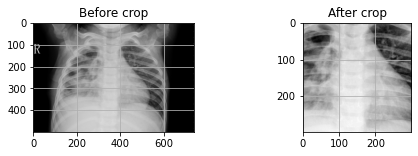

In [17]:
new_img = resize_image_limit(img, 500, 500)
print(f'Size of image before crop {new_img.size}')
fig, imgs = plt.subplots(1, 2, figsize=(8,2))
imgs[0].imshow(new_img, cmap='gray')
imgs[0].set_title('Before crop')
imgs[0].grid(True)
crop_img = transforms.CenterCrop(size=300)(new_img)
imgs[1].imshow(crop_img, cmap='gray')
imgs[1].set_title('After crop')
imgs[1].grid(True)

In [19]:
dir = r'../Pneumonia_classification_data/chest_xray'
limit_width = 500
limit_height = 500
crop_size = 500
reshaped_dir = rf'../Pneumonia_classification_data/reshape_{crop_size}'

for root, dirs, files in tqdm(os.walk(dir)):
    for name in files:
        filepath = root + os.sep + name
        if name.endswith('.jpeg'):
            img = Image.open(filepath)
            if img.size[0] > limit_width and img.size[1] > limit_height:  # skip if the image is too small
                # Resize and Crop the image
                img = resize_image_limit(Image.open(filepath), limit_width, limit_height)
                img = transforms.CenterCrop(size=crop_size)(img)
                # Find destination folder
                resh_root = root.replace(dir, reshaped_dir)
                if not os.path.exists(resh_root):
                    os.makedirs(resh_root)
                resh_filepath = resh_root + os.sep + name
                # Save image
                print(f'Saving {resh_filepath}, width: {img.size[0]}, height: {img.size[1]}')
                img.save(resh_filepath)

0it [00:00, ?it/s]

Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0001-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0003-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0005-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0006-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0007-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0009-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0010-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0011-0001-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\IM-0011-0001-0002.jpeg, width: 500, height: 500
Saving ../Pneumonia_classif

3it [00:04,  1.38s/it]

Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0372-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0373-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0374-0001-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0374-0001-0002.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0374-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0376-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0378-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL2-IM-0380-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\test\NORMAL\NORMAL

4it [00:07,  2.16s/it]

Saving ../Pneumonia_classification_data/reshape_500\test\PNEUMONIA\person99_bacteria_474.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0115-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0117-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0119-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0122-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0125-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0127-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0128-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\IM-0129-0001.jpeg, width: 500, height: 500
Saving ../Pneumon

6it [00:39,  8.61s/it]

Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1379-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1385-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1396-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1400-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1401-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1406-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1412-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2-IM-1419-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\NORMAL\NORMAL2

7it [01:19, 16.83s/it]

Saving ../Pneumonia_classification_data/reshape_500\train\PNEUMONIA\person99_virus_183.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\PNEUMONIA\person9_bacteria_38.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\PNEUMONIA\person9_bacteria_39.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\PNEUMONIA\person9_bacteria_40.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\train\PNEUMONIA\person9_bacteria_41.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\NORMAL\NORMAL2-IM-1427-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\NORMAL\NORMAL2-IM-1430-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\NORMAL\NORMAL2-IM-1431-0001.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\NORMAL\NORMAL

10it [01:20,  8.02s/it]

Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1946_bacteria_4874.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1946_bacteria_4875.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1947_bacteria_4876.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1949_bacteria_4880.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1950_bacteria_4881.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1951_bacteria_4882.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1952_bacteria_4883.jpeg, width: 500, height: 500
Saving ../Pneumonia_classification_data/reshape_500\val\PNEUMONIA\person1954_bacteria_4886.jpeg, width: 500, height: 500
